In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Логистическая регрессия

## Классификация с помощью линейной регрессии

In [2]:
cancer = load_iris()

In [3]:
data = cancer.data
fn = cancer.feature_names

In [4]:
tsne = TSNE(n_components=2)

In [5]:
tsne_data = tsne.fit_transform(data)

<p>В некоторых задачах классификации, мы бы хотели разделить классы с помощью линейной плоскости, поскольку данные хорошо подходят для этого алгоритма</p>

In [6]:
lr = LinearRegression()

In [7]:
cancer.target[cancer.target != 0] = -1
cancer.target[cancer.target == 0] = 1

In [8]:
plt.style.use('seaborn')

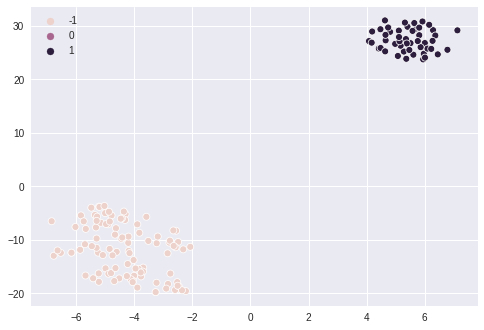

In [9]:
sns.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=cancer.target);

In [10]:
lr.fit(tsne_data, cancer.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.coef_

array([0.09922435, 0.02555628], dtype=float32)

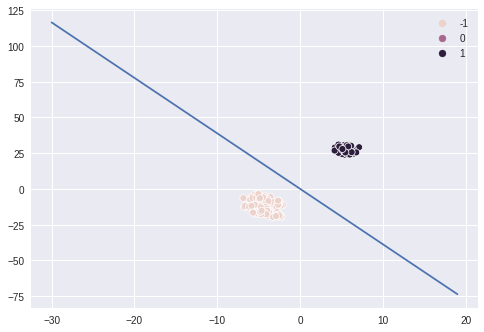

In [12]:
sns.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=cancer.target);
plt.plot(np.arange(-30, 20), -np.arange(-30, 20)*lr.coef_[0]/lr.coef_[1]);

<p>Это возможно если мы дадим метки классам {-1;1} и будем тренировать алгоритм как обычно, в этом случае точки ниже линии будут отрицательного класса, а выше положительного.</p>
<p>Однако это не является лучшим выбором поскольку мы не можем сказать с какой уверенностью алгоритм дает ответ пренадлежности к тому или иному классу</p>

## Отступ

<p>В качестве меры уверенности, логичным решением является использование расстояние от точки до разделяющей прямой, данное расстояние называется отступом и обозначается M(x)</p>
<p>Кроме того у отступа имеется знак и он положителен если текущая точка находится на стороне своего класса и отрицателен если наоборот</p>
<p><center>$$\large{M(x_i) = [y_i == y_c]<x_iw>}$$</center></p>
<p>Отступ показывает уверенность нашего предсказания, однако мы бы хотели опрерировать вероятностями пренадлежности класса, для этого нам необходима функция которая бы переводила значение из отрезка ($-\infty;+\infty$) в отрезок (0; 1). Так же желательно чтобы данная функция была дифференцируема, одним из лучших выборов для данных ограниченией является сигмоид функция</p>
<p><center>$$\large{\sigma = \frac{1}{1+\exp^{(-M(x))}}}$$</center></p>
<p>Так же важно что производная сигмоид функции, очень близка к нормальному распределению</p>

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

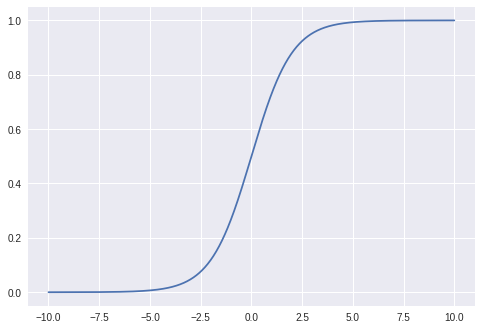

In [14]:
plt.plot(np.linspace(-10, 10, 1000), [sigmoid(var) for var in np.linspace(-10, 10, 1000)]);

In [15]:
def sigmoid_deveriate(x):
    return sigmoid(x)*(1-sigmoid(x))

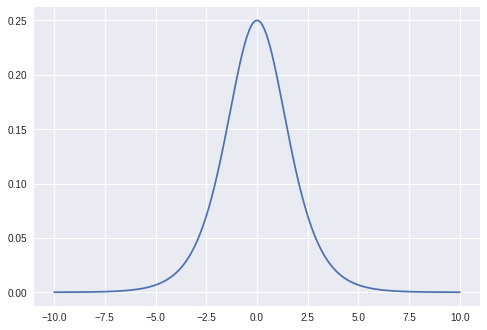

In [16]:
plt.plot(np.linspace(-10, 10, 1000), [sigmoid_deveriate(var) for var in np.linspace(-10, 10, 1000)]);

<p>Еще одним условием для построения хорошей модели линейного разделения классов, это изменение функции оптимизация с квадратичной ошибки на что-то другое</p>
<p>Наилучшим способом является оптимизации функции правдоподобия, данная функция показывает насколько ответы алгоритма правдоподобны данным</p>
<p><center>$$\large{L=\prod_{i=1}^{N}p(y_i|\sigma_i)}$$</center></p>

- $p(y_i|\sigma_i) = \sigma$ для положительного класса 
- $p(y_i|\sigma_i) = 1 - \sigma$ для отрицательного класса

<p>Недостатоком этой функции, является сложное дифференцирование, из-за произведения внутри нее, однако данная проблема легко обходится взятием логарифма, которые преобразует произведение в сумму</p>
<p><center>$$\large{L=\sum_{i=1}^{N}[y\log(\sigma)+(1-y)\log(1-\sigma)]}$$</center></p>
<p>Модель минимизирующая отступ, путем минимизации отрицательной функции логарифмического правдопобия называется логистической регрессией</p>
<p>Данная модель представленна классом LogisticRegression, в библиотеке sklearn модуля liner_models</p>
<p>Параметры модели:</p>

- penalty - регуляризация модели (l1, l2, elasticnet)
- C - сила регуляризации

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(tsne_data, cancer.target)

/home/imd/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

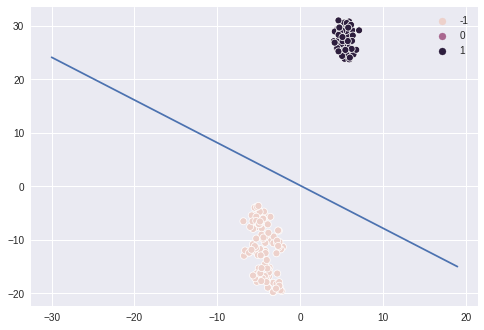

In [19]:
sns.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=cancer.target);
plt.plot(np.arange(-30, 20), (-np.arange(-30, 20)*lr.coef_[0, 0] - lr.intercept_)/lr.coef_[0, 1]);